<br>
<br>
<h1><center> Risk Sensitivity and Theory of Mind in Human Coordination

<center>Pedro L. Ferreira$^1$, Francisco C. Santos$^1$, Sérgio Pequito$^2$</center>
<br>
<center>$^1$INESC-ID and Instituto Superior Técnico,  Universidade de Lisboa,  2744-016 Porto Salvo,Portugal</center>
<center>$^2$Delft Center for Systems and Control,  Technische Universiteit Delft,  Mekelweg 22628 CDDelft, Netherlands</center>
<hr>

<center><h1>Multiplayer Experiments with Cumulative Prospect Theory in Normal-Form Stag Hunt Game</center>
<br>

In [33]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib as mpl

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

mpl.rcParams['axes.formatter.min_exponent'] = 10

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

<hr>
<br>
<br>
<center><h2> Utility Function </h2></center>
<br>

In [34]:
def u_plus(o,power=0.85):
    return o**power
def u_minus(o,power=0.85,loss_aversion=2):
    return -loss_aversion*np.abs(o)**power

def u(o,power=0.85,loss_aversion=2):
    if o >= 0:
        return u_plus(o,power)
    else:
        return u_minus(o,power,loss_aversion)

<hr>
<br>
<br>
<center><h2> Probability Weighting Function </h2></center>
<br>

In [41]:
def w(p,alpha,delta=0.75):
    return np.exp(-alpha*(-np.log(p))**delta)

<hr>
<br>
<br>
<center><h2> CPT-Value Difference function </h2></center>
<br>

In [42]:
def f(p,b,a,la,cc):
    psi_R = w(p, a) if R-b>0 else 1-w(1-p, a)
    psi_S = w(1-p, a) if S-b>0 else 1-w(p, a)
    return u(R-b,cc,la)*psi_R + u(S-b,cc,la)*psi_S - u(T-b,cc,la)

<hr>
<br>
<br>
<center><h2> Stag Hunt Normal-form Game Definition </h2></center>
<br>

In [45]:
R = 5
S = -1
T = P = 1

nash = (P-S)/(R-T-S+P)
print("Nash Equilibrium:",nash)

Nash Equilibrium: 0.3333333333333333


<hr>
<br>
<br>
<center><h2>Figure 3 of the Manuscript</h2></center>
<br>
<center>2-Player Normal-Form Stag Hunt Game with Cumulative Prospect Theory</center>

In [46]:
resolution = 50 # Resolution of the resulting plot

baseline_default = 0
alpha_default = 1
loss_aversion_default = 1
concavity_default = 1

baselines      = np.linspace(-6,8 ,resolution)
alphas         = np.linspace(0.3,3,resolution)
loss_aversions = np.linspace(1,3  ,resolution)
concavities    = np.linspace(0.5,2,resolution)

pols_alphas_baselines           = np.zeros((len(alphas),len(baselines)))
pols_alphas_loss_aversion       = np.zeros((len(alphas),len(loss_aversions)))
pols_alphas_concavities         = np.zeros((len(alphas),len(concavities)))
pols_loss_aversions_baselines   = np.zeros((len(loss_aversions),len(baselines)))
pols_concavities_baselines      = np.zeros((len(concavities),len(baselines)))
pols_concavities_loss_aversions = np.zeros((len(concavities),len(loss_aversions)))


for i,baseline in enumerate(baselines):
    print("Alpha vs Baseline {:.1%}     ".format((i+1)/len(baselines)),end="\r")
    for j,alpha in enumerate(alphas):
        sol = optimize.root(lambda p:f(p,baseline,alpha,loss_aversion_default,concavity_default), 0.5, method="lm")
        pols_alphas_baselines[j,i] = sol.x[0]
        
        
for i,loss_aversion in enumerate(loss_aversions):
    print("Alpha vs Loss aversion {:.1%}     ".format((i+1)/len(loss_aversions)),end="\r")
    for j,alpha in enumerate(alphas):
        sol = optimize.root(lambda p:f(p,baseline_default,alpha,loss_aversion,concavity_default), 0.5, method="lm")
        pols_alphas_loss_aversion[j,i] = sol.x[0]
        

for i,concavity in enumerate(concavities):
    print("Alpha vs Loss aversion {:.1%}     ".format((i+1)/len(concavities)),end="\r")
    for j,alpha in enumerate(alphas):
        sol = optimize.root(lambda p:f(p,baseline_default,alpha,loss_aversion_default,concavity), 0.5, method="lm")
        pols_alphas_concavities[j,i] = sol.x[0]
        

for i,baseline in enumerate(baselines):
    print("Loss aversion vs Baseline {:.1%}     ".format((i+1)/len(baselines)),end="\r")
    for j,loss_aversion in enumerate(loss_aversions):
        sol = optimize.root(lambda p:f(p,baseline,alpha_default,loss_aversion,concavity_default), 0.5, method="lm")
        pols_loss_aversions_baselines[j,i] = sol.x[0]
        
        
for i,baseline in enumerate(baselines):
    print("Concavity vs Baseline {:.1%}     ".format((i+1)/len(baselines)),end="\r")
    for j,concavity in enumerate(concavities):
        sol = optimize.root(lambda p:f(p,baseline,alpha_default,loss_aversion_default,concavity), 0.5, method="lm")
        pols_concavities_baselines[j,i] = sol.x[0]
        
    
for i,loss_aversion in enumerate(loss_aversions):
    print("Loss aversion vs Concavity {:.1%}     ".format((i+1)/len(loss_aversions)),end="\r")
    for j,concavity in enumerate(concavities):
        sol = optimize.root(lambda p:f(p,baseline_default,alpha_default,loss_aversion,concavity), 0.5, method="lm")
        pols_concavities_loss_aversions[j,i] = sol.x[0]
        

Alpha vs Baseline 20.0%     

<ipython-input-41-2f698a88ea99>:2: RuntimeWarning: invalid value encountered in log
  return np.exp(-alpha*(-np.log(p))**delta)
<ipython-input-41-2f698a88ea99>:2: RuntimeWarning: invalid value encountered in power
  return np.exp(-alpha*(-np.log(p))**delta)


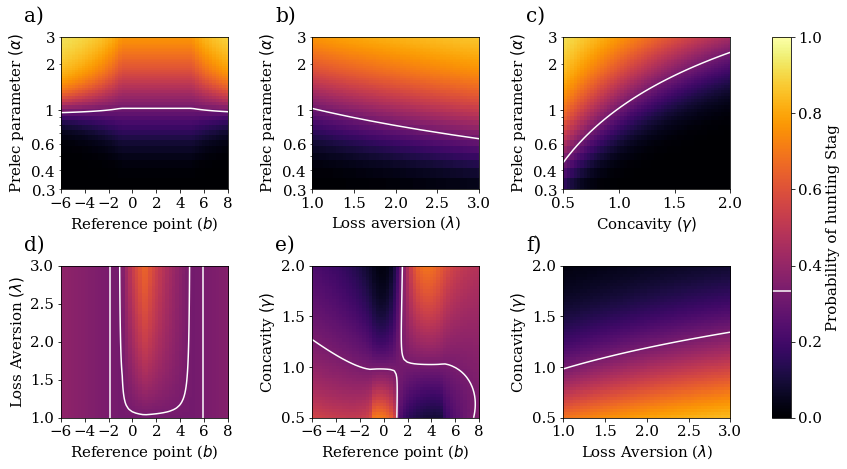

In [47]:
f,axes = plt.subplots(2,3,figsize=(15,7))

ax = axes[0,0]
extent = [baselines[0],baselines[-1],alphas[0],alphas[-1]]
ax.imshow(pols_alphas_baselines,extent=extent,cmap="inferno",origin="lower",aspect="auto",interpolation="none",vmin=0,vmax=1)
ax.set_ylabel(r"Prelec parameter $(\alpha)$")
ax.set_xlabel(r"Reference point ($b$)")
ax.set_xticks(range(-6,8+1,2))
ax.set_yscale("log")
ax.contour(pols_alphas_baselines,extent=extent,levels=[nash],colors="white")

ax = axes[0,1]
extent = [loss_aversions[0],loss_aversions[-1],alphas[0],alphas[-1]]
ax.imshow(pols_alphas_loss_aversion,extent=extent,cmap="inferno",origin="lower",aspect="auto",interpolation="none",vmin=0,vmax=1)
ax.set_ylabel(r"Prelec parameter $(\alpha)$")
ax.set_xlabel(r"Loss aversion ($\lambda$)")
ax.set_xticks([1,1.5,2,2.5,3])
ax.set_yscale("log")
ax.contour(pols_alphas_loss_aversion,extent=extent,levels=[nash],colors="white")

ax = axes[0,2]
extent = [concavities[0],concavities[-1],alphas[0],alphas[-1]]
ax.imshow(pols_alphas_concavities,extent=extent,cmap="inferno",origin="lower",aspect="auto",interpolation="none",vmin=0,vmax=1)
ax.set_ylabel(r"Prelec parameter $(\alpha)$")
ax.set_xlabel(r"Concavity $(\gamma)$")
ax.set_yscale("log")
ax.contour(pols_alphas_concavities,extent=extent,levels=[nash],colors="white")

ax = axes[1,0]
extent = [baselines[0],baselines[-1],loss_aversions[0],loss_aversions[-1]]
ax.imshow(pols_loss_aversions_baselines,extent=extent,cmap="inferno",origin="lower",aspect="auto",interpolation="none",vmin=0,vmax=1)
ax.set_ylabel(r"Loss Aversion $(\lambda)$")
ax.set_xlabel(r"Reference point ($b$)")
ax.set_xticks(range(-6,8+1,2))
ax.contour(pols_loss_aversions_baselines,extent=extent,levels=[nash],colors="white")

ax = axes[1,1]
extent = [baselines[0],baselines[-1],concavities[0],concavities[-1]]
ax.imshow(pols_concavities_baselines,extent=extent,cmap="inferno",origin="lower",aspect="auto",interpolation="none",vmin=0,vmax=1)
ax.set_ylabel(r"Concavity $(\gamma)$")
ax.set_xlabel(r"Reference point ($b$)")
ax.set_xticks(range(-6,8+1,2))
ax.contour(pols_concavities_baselines,extent=extent,levels=[nash],colors="white")

ax = axes[1,2]
extent = [loss_aversions[0],loss_aversions[-1],concavities[0],concavities[-1]]
im = ax.imshow(pols_concavities_loss_aversions,extent=extent,cmap="inferno",origin="lower",aspect="auto",interpolation="none",vmin=0,vmax=1)
ax.set_ylabel(r"Concavity $(\gamma)$")
ax.set_xlabel(r"Loss Aversion ($\lambda$)")
ax.set_xticks([1,1.5,2,2.5,3])
ax.contour(pols_concavities_loss_aversions,extent=extent,levels=[nash],colors="white")

import string
for n,ax in enumerate(axes.flatten()):
    ax.text(-0.22, 1.1, string.ascii_lowercase[n]+")", transform=ax.transAxes, size=20)

f.subplots_adjust(wspace=0.5,hspace=0.5)

cb = f.colorbar(im, ax=axes.ravel().tolist(),label="Probability of hunting Stag")
cb.ax.plot([0, 1], [1/3]*2, 'w')

plt.savefig("Normal Form/expanded.pdf",bbox_inches = 'tight')
plt.show()